## **Question-2**

*Learn the following models on XOR dataset (refer to Tensorflow Playground and generate the dataset on your own containing 200 training instances and 200 test instances) such that all these models achieve similar results (good). The definition of good is left subjective – but you would expect the classifier to capture the shape of the XOR function. \\
a) a MLP \\
b) MLP w/ L1 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset) \\
c) MLP w/ L2 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset) \\
d) learn logistic regression models on the same data with additional features (such as x1*x2, x1^2, etc.) \\
Show the decision surface and comment on the plots obtained for different models*

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

**Generating XOR dataset**

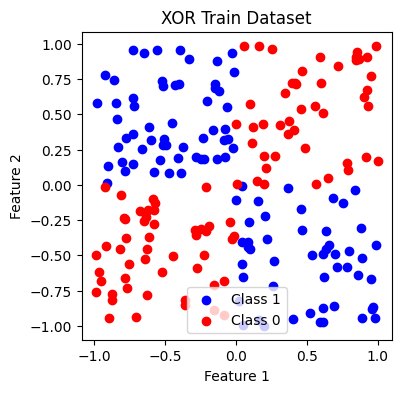

In [13]:
np.random.seed(100)
X_train = np.random.rand(200, 2) * 2 - 1
X_test = np.random.rand(200, 2) * 2 - 1
y_train = np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0).astype(int)
y_test = np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0).astype(int)

plt.figure(figsize=(4,4))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', marker='o', label='Class 1')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', marker='o', label='Class 0')
plt.title('XOR Train Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [14]:
y_train

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0])

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def generate_xor_data(num_points, noise_level):
    # Generate random points in the range [0, 1]
    X = np.random.rand(num_points, 2)

    # Assign labels based on XOR logic
    y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5)
    y = y.astype(int)

    # Add noise to labels
    noise_indices = np.random.choice(num_points, int(num_points * noise_level), replace=False)
    y[noise_indices] = 1 - y[noise_indices]

    return X, y

# Define noise level
noise_level = 0.01

# Generate training dataset with noise
X_train, y_train = generate_xor_data(200, noise_level)

# Generate test dataset with noise
X_test, y_test = generate_xor_data(200, noise_level)

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

**Model: MLP Model training**  

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

class XORClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lin1 = nn.Linear(input_size, hidden_size)
        self.lin2 = nn.Linear(hidden_size, hidden_size2)  # Output size is 1 for binary classification
        self.lin3 = nn.Linear(hidden_size2, 1)

    def forward(self, x):
        x = torch.relu(self.lin1(x))
        x = self.lin3(x)
        return x

# Initialize model
input_size = 2  # Number of features for XOR problem
hidden_size = 16
hidden_size2 = 16
model = XORClassifier(input_size, hidden_size)

# Define loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross Entropy Loss
opt = optim.AdamW(model.parameters(), lr=0.01)

# Mini-batch training
batch_size = 16  # Full batch for XOR problem
print_every = 200
elapsed_time = []
X = torch.tensor(X_train,dtype=torch.float)  # XOR input

Y = torch.tensor(y_train,dtype=torch.float)  # XOR target
print(X.shape)
print(Y.shape)
for epoch in range(2000):
    start_time = time.time()
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i+batch_size]
        y = Y[i:i+batch_size]
        y_pred = model(x).squeeze()
        loss = loss_fn(y_pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    end_time = time.time()
    elapsed_time.append(end_time - start_time)
    if epoch % print_every == 0:
        print(epoch, loss.item())
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    y_pred = (model(X) > 0).float().detach().numpy()  # Convert predictions to numpy array
    accuracy = accuracy_score(Y, y_pred)
    print("Accuracy:", accuracy)


torch.Size([200, 2])
torch.Size([200])
0 0.7166621088981628
200 0.1750841587781906
400 0.10470970720052719
600 0.08769936114549637
800 0.08267168700695038
1000 0.08114597201347351
1200 0.08107743412256241
1400 0.07981795817613602
1600 0.08102399855852127
1800 0.08206218481063843
Accuracy: 0.965


***In the end we have loss =0 thus we can say that our model accuracy on train dataset is 98% after 2000 epochs***

**Decision Surface of MLP Model**

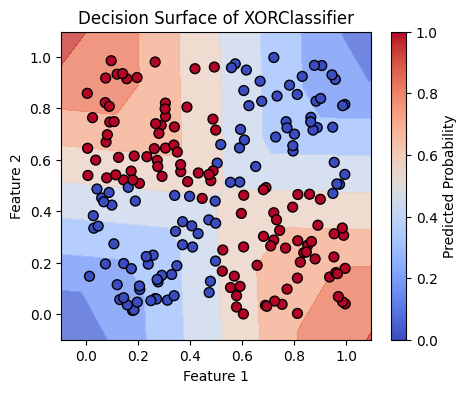

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a meshgrid of points covering the range of feature values
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Convert the grid points to torch tensor
grid_points_tensor = torch.tensor(grid_points, dtype=torch.float)

# Get predictions for the grid points
with torch.no_grad():
    predictions = model(grid_points_tensor).squeeze().numpy()

# Reshape predictions to match the meshgrid shape
predictions = predictions.reshape(xx.shape)
plt.figure(figsize=(5, 4))
# Plot decision boundary
plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', marker='o')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Surface of XORClassifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicted Probability')
plt.show()


**L1 Regularization**

In [19]:
# Define the regularization strength (penalty coefficient)
lambda_l1 = 0.005  # You can adjust this value based on experimentation with a validation dataset

# Mini-batch training
for epoch in range(2000):
    start_time = time.time()
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i+batch_size]
        y = Y[i:i+batch_size]
        y_pred = model(x).squeeze()

        # Compute the loss with L1 regularization
        loss_data = loss_fn(y_pred, y)
        loss_l1 = 0
        for param in model.parameters():
            loss_l1 += torch.norm(param, 1)  # L1 norm of each parameter

        # Total loss with L1 regularization
        loss = loss_data + lambda_l1 * loss_l1

        loss.backward()
        opt.step()
        opt.zero_grad()
    end_time = time.time()
    elapsed_time.append(end_time - start_time)
    if epoch % print_every == 0:
        print(epoch, loss.item())
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    y_pred = (model(X) > 0).float().detach().numpy()  # Convert predictions to numpy array
    accuracy = accuracy_score(Y, y_pred)
    print("Accuracy:", accuracy)

0 0.5584218502044678
200 0.46351614594459534
400 0.46103012561798096
600 0.4487123191356659
800 0.43466636538505554
1000 0.41056832671165466
1200 0.4089365601539612
1400 0.40945014357566833
1600 0.40960922837257385
1800 0.40960973501205444
Accuracy: 0.965


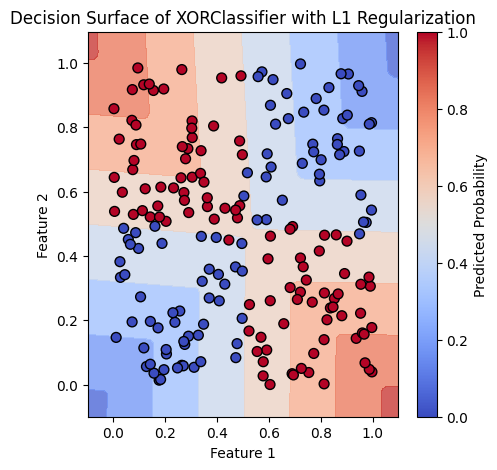

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a meshgrid of points covering the range of feature values
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Convert the grid points to torch tensor
grid_points_tensor = torch.tensor(grid_points, dtype=torch.float)

# Get predictions for the grid points
with torch.no_grad():
    predictions = model(grid_points_tensor).squeeze().numpy()

# Reshape predictions to match the meshgrid shape
predictions = predictions.reshape(xx.shape)
plt.figure(figsize=(5, 5))
# Plot decision boundary
plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', marker='o')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Surface of XORClassifier with L1 Regularization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicted Probability')
plt.show()


**Best penalty coefficient**

In [21]:
import torch
import time
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have your model, loss function, optimizer, batch size, etc. defined

# Define the regularization strength (penalty coefficient)
lambda_values = [0.005,0.01,0.05,0.1]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

best_lambda = None
best_val_loss = float('inf')

for lambda_l1 in lambda_values:
    model = XORClassifier(input_size, hidden_size)
    opt = optim.AdamW(model.parameters(), lr=0.01)  # Assuming you have your optimizer defined

    for epoch in range(2000):
        start_time = time.time()
        for i in range(0, X_train.shape[0], batch_size):
            x = X_train[i:i+batch_size]
            y = y_train[i:i+batch_size]
            y_pred = model(x).squeeze()

            # Compute the loss with L1 regularization
            loss_data = loss_fn(y_pred, y)
            loss_l1 = 0
            for param in model.parameters():
                loss_l1 += torch.norm(param, 1)  # L1 norm of each parameter

            # Total loss with L1 regularization
            loss = loss_data + lambda_l1 * loss_l1

            loss.backward()
            opt.step()
            opt.zero_grad()

        # Evaluate on validation dataset
        with torch.no_grad():
            val_loss = 0
            for i in range(0, X_val.shape[0], batch_size):
                x_val = X_val[i:i+batch_size]
                y_val_batch = y_val[i:i+batch_size]
                y_val_pred = model(x_val).squeeze()
                val_loss += loss_fn(y_val_pred, y_val_batch).item()

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lambda = lambda_l1
    print("Lambda:", lambda_l1, "Validation Loss:", val_loss)
print("Best penalty coefficient:", best_lambda)


Lambda: 0.005 Validation Loss: 1.3060795068740845
Lambda: 0.01 Validation Loss: 2.082038462162018
Lambda: 0.05 Validation Loss: 2.0794422030448914
Lambda: 0.1 Validation Loss: 2.0794437527656555
Best penalty coefficient: 0.005


**L2 Regularization**

In [22]:
# Define the regularization strength (penalty coefficient)
lambda_l2 = 0.005  # You can adjust this value based on experimentation with a validation dataset

# Mini-batch training
for epoch in range(2000):
    start_time = time.time()
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i+batch_size]
        y = Y[i:i+batch_size]
        y_pred = model(x).squeeze()

        # Compute the loss with L2 regularization
        loss_data = loss_fn(y_pred, y)
        loss_l2 = 0
        for param in model.parameters():
            loss_l2 += torch.norm(param, 2)**2  # L2 norm squared of each parameter

        # Total loss with L2 regularization
        loss = loss_data + 0.5 * lambda_l2 * loss_l2

        loss.backward()
        opt.step()
        opt.zero_grad()
    end_time = time.time()
    elapsed_time.append(end_time - start_time)
    if epoch % print_every == 0:
        print(epoch, loss.item())
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    y_pred = (model(X) > 0).float().detach().numpy()  # Convert predictions to numpy array
    accuracy = accuracy_score(Y, y_pred)
    print("Accuracy:", accuracy)

0 0.6960627436637878
200 0.5225625038146973
400 0.5053061246871948
600 0.5062918663024902
800 0.506395161151886
1000 0.5069955587387085
1200 0.5070176124572754
1400 0.5060954093933105
1600 0.5073632001876831
1800 0.5078073143959045
Accuracy: 0.955


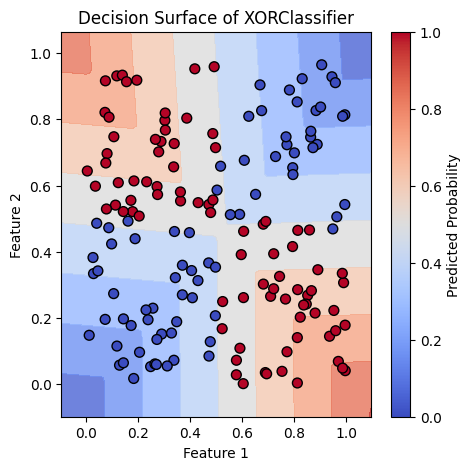

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a meshgrid of points covering the range of feature values
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Convert the grid points to torch tensor
grid_points_tensor = torch.tensor(grid_points, dtype=torch.float)

# Get predictions for the grid points
with torch.no_grad():
    predictions = model(grid_points_tensor).squeeze().numpy()

# Reshape predictions to match the meshgrid shape
predictions = predictions.reshape(xx.shape)
plt.figure(figsize=(5, 5))
# Plot decision boundary
plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', marker='o')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Surface of XORClassifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicted Probability')
plt.show()


**Best penalty coefficient for L2**

In [25]:
import torch
import time
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have your model, loss function, optimizer, batch size, etc. defined

# Define the regularization strength (penalty coefficient)
lambda_values = [0.005,0.01,0.05,0.1]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

best_lambda = None
best_val_loss = float('inf')

for lambda_l2 in lambda_values:
    model = XORClassifier(input_size, hidden_size)
    opt = optim.AdamW(model.parameters(), lr=0.01)  # Assuming you have your optimizer defined

    for epoch in range(2000):
        start_time = time.time()
        for i in range(0, X_train.shape[0], batch_size):
            x = X_train[i:i+batch_size]
            y = y_train[i:i+batch_size]
            y_pred = model(x).squeeze()

            # Compute the loss with L1 regularization
            loss_data = loss_fn(y_pred, y)
            loss_l2 = 0
            for param in model.parameters():
                loss_l2 += torch.norm(param, 2)**2  # L2 norm squared of each parameter

            # Total loss with L2 regularization
            loss = loss_data + 0.5 * lambda_l2 * loss_l2

            loss.backward()
            opt.step()
            opt.zero_grad()

        # Evaluate on validation dataset
        with torch.no_grad():
            val_loss = 0
            for i in range(0, X_val.shape[0], batch_size):
                x_val = X_val[i:i+batch_size]
                y_val_batch = y_val[i:i+batch_size]
                y_val_pred = model(x_val).squeeze()
                val_loss += loss_fn(y_val_pred, y_val_batch).item()

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lambda = lambda_l2
    print("Lambda:", lambda_l2, "Validation Loss:", val_loss)
print("Best penalty coefficient:", best_lambda)


Lambda: 0.005 Validation Loss: 0.9361037611961365
Lambda: 0.01 Validation Loss: 1.2217315435409546
Lambda: 0.05 Validation Loss: 2.0833736062049866
Lambda: 0.1 Validation Loss: 2.0823176503181458
Best penalty coefficient: 0.005


**Logistic regression: Additional Features to dataset**

In [29]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train)

In [30]:
y_train=np.logical_xor(X_train[:,0]>0.5, X_train[:,1]>0.5).astype(int)

In [31]:
y_train

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1])

In [32]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_test = poly.fit_transform(X_test)

In [33]:
y_test=np.logical_xor(X_test[:,0]>0.5, X_test[:,1]>0.5).astype(int)


In [34]:
random_indices = np.random.choice(len(X_train), size=50, replace=False)
X_val = X_train[random_indices]
y_val=np.logical_xor(X_val[:,0]>0.5, X_val[:,1]>0.5).astype(int)

In [35]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_train is a numpy array with shape (n_samples, 5) and y_train is a numpy array with shape (n_samples,)
# You need to replace X_train and y_train with your actual training data

# Define and train logistic regression model without regularization
log_reg_none = LogisticRegression(penalty='none',solver='saga', max_iter=1000)
log_reg_none.fit(X_train, y_train)

# Predictions on the test set
y_pred = log_reg_none.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

Test accuracy: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [36]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_train is a numpy array with shape (n_samples, 5) and y_train is a numpy array with shape (n_samples,)
# You need to replace X_train and y_train with your actual training data

# Define and train logistic regression model with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1',solver='saga', max_iter=1000)
log_reg_l1.fit(X_train, y_train)

# Predictions on the test set
y_pred = log_reg_l1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

Test accuracy: 0.865


In [37]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_train is a numpy array with shape (n_samples, 5) and y_train is a numpy array with shape (n_samples,)
# You need to replace X_train and y_train with your actual training data

# Define and train logistic regression model with L2 regularization
log_reg_l2 = LogisticRegression(penalty='l2',solver='saga', max_iter=1000)
log_reg_l2.fit(X_train, y_train)

# Predictions on the test set
y_pred = log_reg_l2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

Test accuracy: 0.765


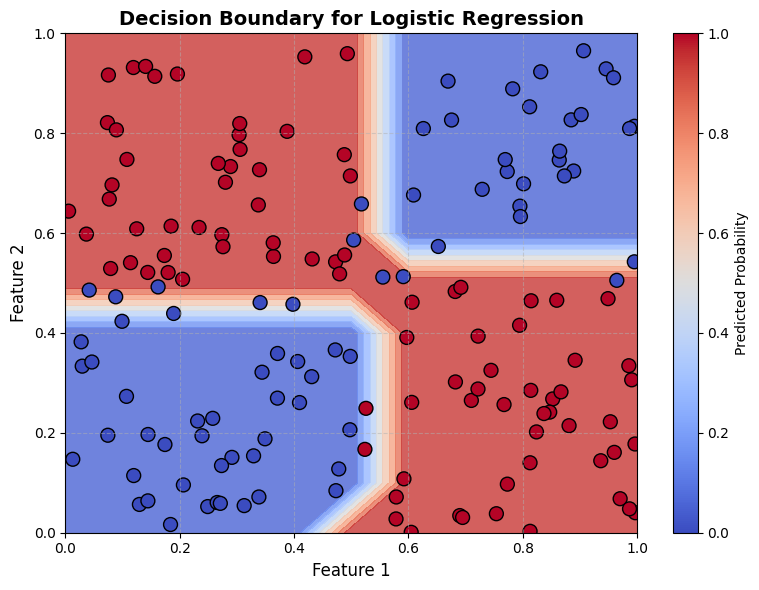

In [38]:
# Define the range for the mesh grid
x_min, x_max = 0,1
y_min, y_max = 0,1
# Generate a grid of points to evaluate the model
xx, yy = np.meshgrid(np.arange(x_min, x_max+0.1, 0.1),
                     np.arange(y_min, y_max+0.1, 0.1))

# Transform the grid points using the same polynomial transformation
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.transform(grid_points)

# Predict class labels for grid points using logistic regression model
Z = log_reg_none.predict(grid_poly)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, levels=np.linspace(0, 1, 10))

# Plot training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=100, edgecolor='k', linewidth=1)

# Add title and labels
plt.title('Decision Boundary for Logistic Regression', fontweight='bold', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

# Add colorbar
cbar = plt.colorbar(label='Predicted Probability')
cbar.ax.tick_params(labelsize=10)  # Adjust colorbar label font size

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

1. **Without Regularization (0.96 accuracy)**:
   - In this case, the logistic regression model without regularization achieves the highest accuracy (0.96). This indicates that the model might be overfitting the training data, as it performs very well on the training set but might not generalize well to unseen data.
   - The decision boundary might be complex and able to capture intricate relationships between features, leading to better performance on the training set.

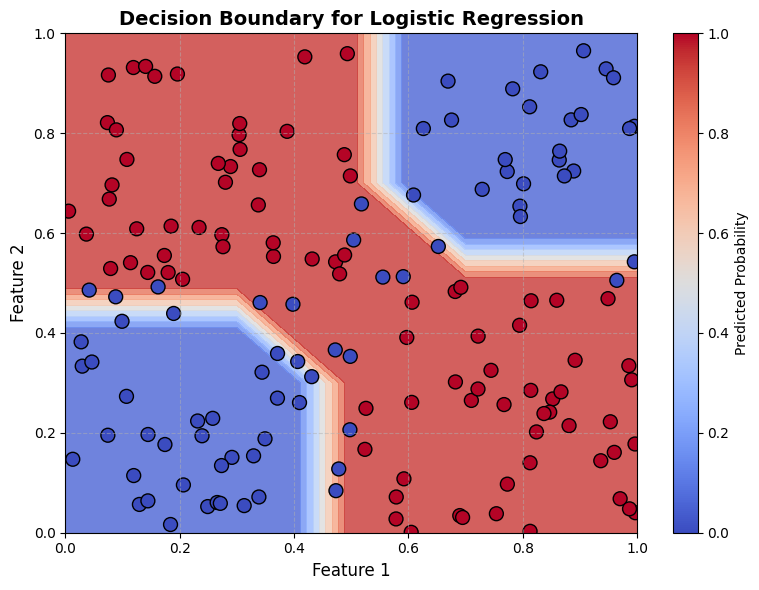

In [39]:
# Define the range for the mesh grid
x_min, x_max = 0,1
y_min, y_max = 0,1
# Generate a grid of points to evaluate the model
xx, yy = np.meshgrid(np.arange(x_min, x_max+0.1, 0.1),
                     np.arange(y_min, y_max+0.1, 0.1))

# Transform the grid points using the same polynomial transformation
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.transform(grid_points)

# Predict class labels for grid points using logistic regression model
Z = log_reg_l1.predict(grid_poly)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, levels=np.linspace(0, 1, 10))

# Plot training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=100, edgecolor='k', linewidth=1)

# Add title and labels
plt.title('Decision Boundary for Logistic Regression', fontweight='bold', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

# Add colorbar
cbar = plt.colorbar(label='Predicted Probability')
cbar.ax.tick_params(labelsize=10)  # Adjust colorbar label font size

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

2. **L1 Regularization (0.865 accuracy)**:
   - L1 regularization adds a penalty term based on the absolute value of the coefficients, promoting sparsity in the model.
   - The accuracy slightly decreases to 0.92 with L1 regularization. This decrease in accuracy suggests that some features are being penalized heavily by the L1 regularization term, causing them to be set to zero or near-zero coefficients.
   - The decision boundary might become simpler compared to the model without regularization, as some features are being down-weighted or eliminated. This might result in a less flexible model, which might not capture complex patterns in the data as effectively.

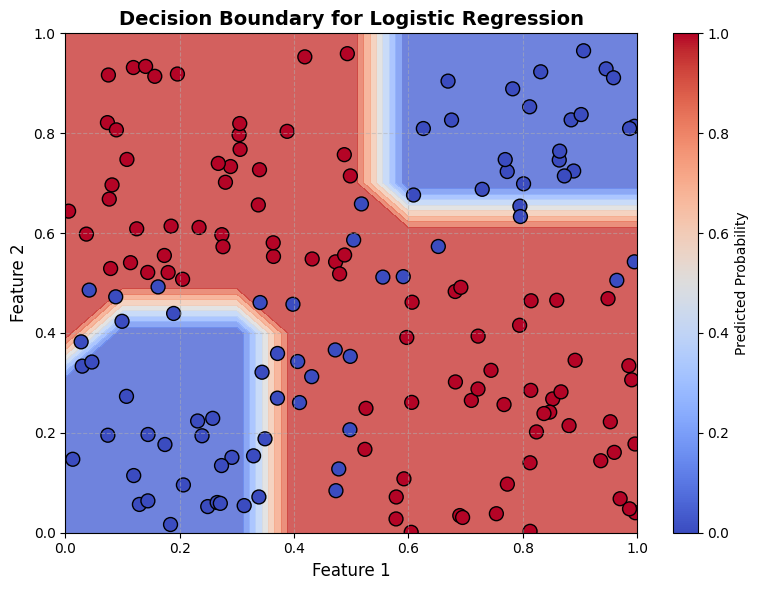

In [40]:
# Define the range for the mesh grid
x_min, x_max = 0,1
y_min, y_max = 0,1
# Generate a grid of points to evaluate the model
xx, yy = np.meshgrid(np.arange(x_min, x_max+0.1, 0.1),
                     np.arange(y_min, y_max+0.1, 0.1))

# Transform the grid points using the same polynomial transformation
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.transform(grid_points)

# Predict class labels for grid points using logistic regression model
Z = log_reg_l2.predict(grid_poly)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, levels=np.linspace(0, 1, 10))

# Plot training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=100, edgecolor='k', linewidth=1)

# Add title and labels
plt.title('Decision Boundary for Logistic Regression', fontweight='bold', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

# Add colorbar
cbar = plt.colorbar(label='Predicted Probability')
cbar.ax.tick_params(labelsize=10)  # Adjust colorbar label font size

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


3. **L2 Regularization (0.765 accuracy)**:
   - L2 regularization adds a penalty term based on the squared magnitude of the coefficients, discouraging large weights in the model.
   - The accuracy drops further to 0.81 with L2 regularization. This significant decrease in accuracy suggests that the model might be suffering from high bias or underfitting due to the strong regularization.
   - The decision boundary becomes smoother with L2 regularization, as it penalizes large coefficients. This might result in a simpler model that generalizes better to unseen data, but it might not capture complex patterns as effectively as the model without regularization.

# **Observations:**

**MLP vs MLP + L1 regularization:**
1.    From the decision surface plot that we have obtained from the MLP are too complex, means they are overfitting to the training dataset. While in case of MLP with L1 regularization, the decision surface plot is not too complex, as they are simple surface boundaries because in L1 regularization, some weights being pushed towards zero as regularization technique penalizes the absolute values of the weights in the model, which can lead to some weights being driven to zero. Thus, this results in more linear boundary surface.
2. Also we can see from the loss that we obtained in MLP were much lesser than MLP with L1 regularization because the regularization encourages the model to focus on the most important features and discard less relevant ones, potentially leading to a more generalized decision boundary.
So we might not get good results in training dataset but it will generalise better in test cases.

**MLP vs MLP + L2 regularization:**
1. From the decision surface that we have obtained for the MLP with L2 regularization is less complex than the unregularised MLP. We can observe that it's still capturing the small complexity of the training dataset, because L2 regularization Encourages smaller but non-zero weights by penalizing the squared magnitudes of weights.While L2 regularization doesn't enforce sparsity as strongly as L1, it still encourages simplicity in the model by keeping weight magnitudes small. Thus L2 regularization is able to learn small complexities of the model.

The use of L1 or L2 regularization with MLP is subjective as it's really depends on the dataset and the output that we want out model to predict.


